In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160

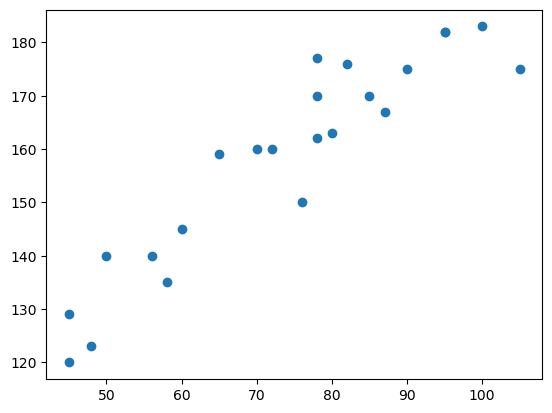

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.show()

In [7]:
df.corr()

Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000

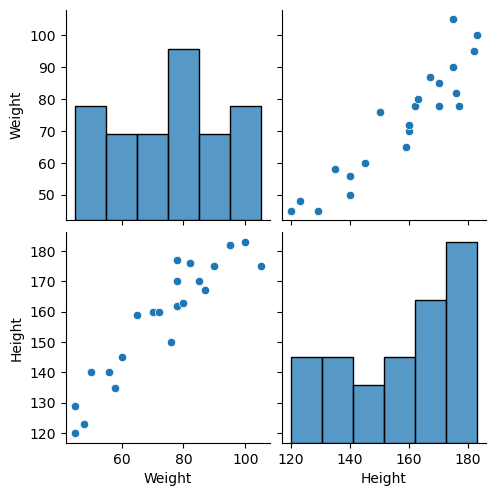

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
x=df[['Weight']]
y=df['Height']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
# Apple Linear regress
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)
regression.coef_
regression.intercept_

156.47058823529412

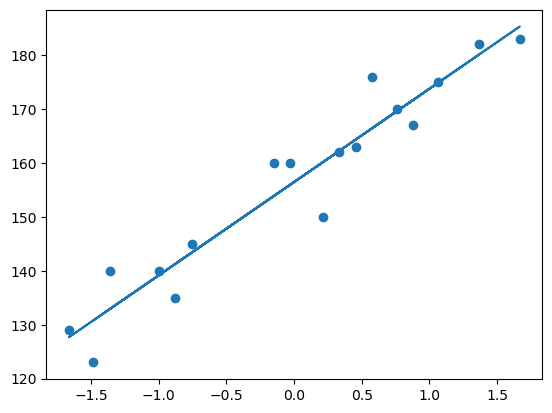

In [20]:
#Create Best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [23]:
# Prediction for test data
y_pred=regression.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse,mae,rmse)

114.84069295228699 9.665125886795005 10.716374991212605


In [25]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [26]:
# Adjusted r2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [29]:
# OLS
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)
print(model.summary())

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [30]:
# predicting height by giving weight
regression.predict(scaler.transform([[72]]))

array([155.97744705])